In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()
train_df.shape

(381109, 12)

In [3]:
train_df['Gender'].replace('Male', 1, inplace=True)
train_df['Gender'].replace('Female', 0, inplace=True)
train_df['Vehicle_Damage'].replace('Yes', 1, inplace=True)
train_df['Vehicle_Damage'].replace('No', 0, inplace=True)

In [4]:
cat_list = pd.get_dummies(train_df['Vehicle_Age'], prefix="vehicle_age")
train_df=train_df.join(cat_list)

In [5]:
train_df.drop(['Vehicle_Age','id'], 1, inplace=True)

In [6]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,0,29,1,41,1,0,27496,152,39,0,0,1,0


In [7]:
X = train_df.loc[:, train_df.columns != 'Response']
y = train_df.loc[:, train_df.columns == 'Response']

# SMOTE

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [11]:
os_X,os_y=os.fit_sample(X_train, y_train)
os_X = pd.DataFrame(data=os_X,columns=columns )
os_y= pd.DataFrame(data=os_y,columns=['Response'])

In [12]:
os_X.shape

(468316, 12)

In [13]:
os_y.shape

(468316, 1)

In [14]:
len(os_y[os_y['Response']==1])

234158

In [15]:
len(os_y[os_y['Response']==0])

234158

In [16]:
print("Number of no interested in oversampled data",len(os_y[os_y['Response']==0]))

Number of no interested in oversampled data 234158


# RFE

In [17]:
train_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years
0,1,44,1,28,0,1,40454,26,217,1,0,0,1
1,1,76,1,3,0,0,33536,26,183,0,1,0,0
2,1,47,1,28,0,1,38294,26,27,1,0,0,1
3,1,21,1,11,1,0,28619,152,203,0,0,1,0
4,0,29,1,41,1,0,27496,152,39,0,0,1,0


In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
logreg = LogisticRegression()

In [20]:
rfe = RFE(logreg, 7)
rfe = rfe.fit(os_X, os_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\users\darsh\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
c:\users\darsh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\darsh\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to conv

[ True False  True False  True  True False False False  True  True  True]
[1 2 1 3 1 1 6 4 5 1 1 1]


In [28]:
cols = ['Gender','Driving_License','Previously_Insured','Vehicle_Damage','vehicle_age_1-2 Year',
        'vehicle_age_< 1 Year','vehicle_age_> 2 Years']

X = os_X[cols]
y = os_y['Response']

# checking p-value

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.363930
         Iterations 11
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.475      
Dependent Variable:    Response          AIC:               340882.7080
Date:                  2020-09-15 18:54  BIC:               340960.1063
No. Observations:      468316            Log-Likelihood:    -1.7043e+05
Df Model:              6                 LL-Null:           -3.2461e+05
Df Residuals:          468309            LLR p-value:       0.0000     
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        11.0000                                         
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Gender                -0.6897   0.0084  -82.3845 0.0000 -0.706

# logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here
#lr=LogisticRegression()

grid=GridSearchCV(estimator=logreg,param_grid=parameters)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8099790028114879


In [26]:
#from sklearn.model_selection import cross_val_score

#scores = cross_val_score(logreg, X_train, y_train, cv=10)
#print('Cross-Validation Accuracy Scores', scores)

In [33]:
#y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(grid.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


# confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[50928 19517]
 [ 7180 62870]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     70445
           1       0.76      0.90      0.82     70050

    accuracy                           0.81    140495
   macro avg       0.82      0.81      0.81    140495
weighted avg       0.82      0.81      0.81    140495



# roc_auc

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

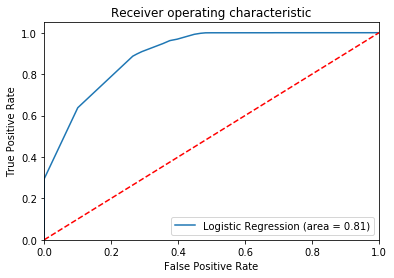

In [35]:
logit_roc_auc = roc_auc_score(y_test, grid.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, grid.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# prediction on test data

In [ ]:
test_df = pd.read_csv("test.csv")
test_df.head()

In [ ]:
test_df['Gender'].replace('Male', 1, inplace=True)
test_df['Gender'].replace('Female', 0, inplace=True)
test_df['Vehicle_Damage'].replace('Yes', 1, inplace=True)
test_df['Vehicle_Damage'].replace('No', 0, inplace=True)

In [ ]:
cat_list = pd.get_dummies(test_df['Vehicle_Age'], prefix="vehicle_age")
test_df=test_df.join(cat_list)

In [ ]:
test_df.drop(['Vehicle_Age','id'], 1, inplace=True)

In [ ]:
test_df.head()
test_df.shape

In [ ]:
test_df = test_df[cols]
test_df.shape

In [ ]:
predicted = logreg.predict(test_df)

In [ ]:
sub = pd.read_csv("sample_submission_iA3afxn.csv",index_col='id')
sub.head()

In [ ]:
sub['Response']=predicted


In [ ]:
sub.to_csv("logistcreg.csv")